# Producto cruz en forma tensorial

## Producto cruz
En matemáticas, el producto vectorial o producto cruz es una operación binaria entre dos vectores en un espacio tridimensional. El resultado es un vector perpendicular a los vectores que se multiplican, y por lo tanto normal al plano que los contiene. Debido a su capacidad de obtener un vector perpendicular a otros dos vectores, cuyo sentido varía de acuerdo al ángulo formado entre estos dos vectores, esta operación es aplicada con frecuencia para resolver problemas matemáticos, físicos o de ingeniería.

### Símbolo de Levi-Civita
En matemáticas, y en particular en cálculo tensorial, se define el símbolo de Levi-Civita, también llamado el símbolo de permutación, símbolo alternante o tensor de Levi-Civita, como sigue:

$$
\epsilon_{ijk} = \left\lbrace \begin{matrix} +1 & \text{si } (i,\ j,\ k)\text{ es }(1,\ 2,\ 3),\ (2,\ 3,\ 1)\ \text{ o }\ (3,\ 1,\ 2)\\-1 & \text{si } (i,\ j,\ k) \text{ es } (3,\ 2,\ 1),\ (1,\ 3,\ 2)\ \text{ o }\ (2,\ 1,\ 3)\\ 0 &\text{de otro modo }i=j \text{ o }j=k\text{ o } k=i\end{matrix}\right.
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
Levi_Civita = np.array([[[0,0,0],[0,0,1],[0,-1,0]],[[0,0,-1],[0,0,0],[1,0,0]],[[0,1,0],[-1,0,0],[0,0,0]]])
Levi_Civita

array([[[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0, -1,  0]],

       [[ 0,  0, -1],
        [ 0,  0,  0],
        [ 1,  0,  0]],

       [[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  0]]])

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Epsilontensor.svg/1280px-Epsilontensor.svg.png)

El producto cruz se puede calcular partiendo del tensor de Levi-Civita según la expresión:
$$\mathbf {a\times b} ={\begin{vmatrix}\mathbf {e_{1}} &\mathbf {e_{2}} &\mathbf {e_{3}} \\a_{1}&a_{2}&a_{3}\\b_{1}&b_{2}&b_{3}\\\end{vmatrix}}=\sum _{i=1}^{3}\left(\sum _{j,k=1}^{3}\epsilon _{ijk}a_{j}b_{k}\right)\mathbf {e} _{i}$$
donde $\mathbf{a}$ y $\mathbf{b}$ son dos vectores de tres dimensiones.

Definiremos dos vectores $\mathbf{a}$ y $\mathbf{b}$ de manera aleatoria con la siguiente función que utiliza numero aleatorios en numpy:

In [ ]:
def random_number():
    number_range = np.random.randint(-50,50)
    fractional_number = np.random.rand()
    return number_range*fractional_number
random_number()

30.946970309613448

In [ ]:
a = np.array([random_number(),random_number(),random_number()])
b = np.array([random_number(),random_number(),random_number()])
print(a,b)

[19.14868488 10.61693856 13.28151787] [-8.69668864 15.41015053  4.35728678]


El producto cruz de vectores se puede realizar siguiendo de diversas formas el producto tensorial.
En este caso se opta por realizar primero el producto de los vectores $\mathbf{a}\cdot \mathbf{b}^T$ para formar una matriz de $3\times 3$. Esto en numpy se realiza multiplicando los vectores $\mathbf{a}$ y $\mathbf{b}$ sobre le eje $0$ con la función $np.tensordot()$.

In [ ]:
mat_a_times_b = np.tensordot(a,b,axes=0)
mat_a_times_b

array([[-166.53015025,  295.08411637,   83.43631151],
       [ -92.33220895,  163.60862131,   46.26104604],
       [-115.50522557,  204.67018959,   57.87138225]])

Para obtener el producto vectorial, se multiplica el tensor de Levi_Civita con la matriz generada de los vectores $\mathbf{a}$ y $\mathbf{b}$. En numpy se realiza multiplicando el tensor con la matriz sobre el eje $2$ lo que genera una contracción de los arreglos, ya que el tensor es de $3\times3\times3$ la matriz es de $3\times3$ y el vector generado es de $1\times3$.

In [ ]:
vec = np.tensordot(Levi_Civita,mat_a_times_b,axes=2)
vec

array([-158.40914355, -198.94153708,  387.41632532])

A continuación se define una función que engloba los pasos anteriores para obtener el producto cruz de dos vectores.

In [ ]:
def cross_product(i,j):
    mat = np.tensordot(i,j,axes=0)
    return np.tensordot(Levi_Civita,mat,axes=2)

En el siguiente código se compara le función  creada con la función nativa de numpy $np.cross()$ para calcular el producto cruz. Se observa que los resultados son iguales.

In [ ]:
print(cross_product(a,b))
print(np.cross(a,b))
print(cross_product(a,b)==np.cross(a,b))

[-158.40914355 -198.94153708  387.41632532]
[-158.40914355 -198.94153708  387.41632532]
[ True  True  True]


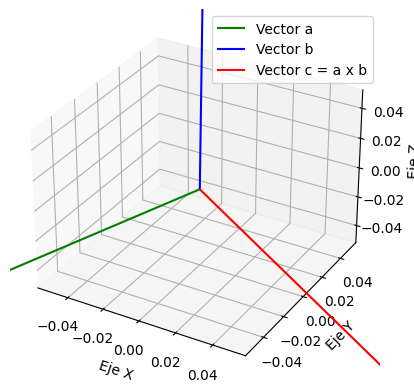

In [ ]:
# Definir los vectores
c = cross_product(a,b)

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Orígenes de los vectores
origin = np.zeros(3)

# Graficar los vectores
ax.quiver(*origin, *a, color='g', label='Vector a')
ax.quiver(*origin, *b, color='b', label='Vector b')
ax.quiver(*origin, *c, color='r', label='Vector c = a x b')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


*Aunque numpy tiene una función nativa para calcular el producto cruz, el objetivo de este proyecto es realizarlo con el producto tensorial como se describe en la ecuación del comienzo.*